# Función Asintota

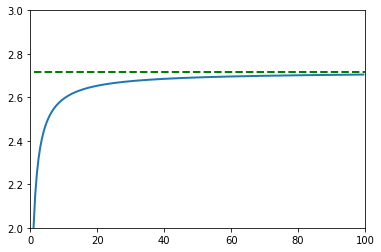

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

NUMERO_GRANDE = 100

# First set up the figure, the axis, and the plot element we want to animate

fig = plt.figure()
ax = plt.axes(xlim=(0, NUMERO_GRANDE), ylim=(2, 3))
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], "g--", lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    return line, line2

# animation function.  This is called sequentially
def animate(i):
    f = lambda x: (1+1/x)**x
    asintota = np.exp(1)

    x = np.linspace(1, NUMERO_GRANDE, 200)    
    line.set_data(x[:i], f(x[:i]))
    
    line2.set_data(x, asintota*np.ones(len(x)))
  

    return line, line2

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

# Función Tangente

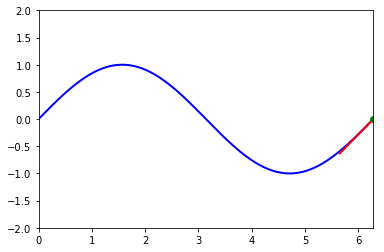

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2*np.pi), ylim=(-2, 2))
line, = ax.plot([], [], 'b', lw=2)
line2, = ax.plot([], [], 'r', lw=2)
dot, = ax.plot([], [], 'go')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    f = lambda x: np.sin(x)
    df = lambda x, h: (f(x + h) - f(x)) / h

    x = np.linspace(0, 2*np.pi, 200)    
    line.set_data(x, f(x))
    
    p = lambda a: df(x[i], 0.001)*(a - x[i]) + f(x[i])

    xx = x[max(0, i-20):min(len(x), i+20)-1]

    line2.set_data(xx, p(xx))

    dot.set_data(x[i], f(x[i]))
     #print(x[i], f(x[i]), df(x[i], 0.001))


    return line, line2, dot

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('basic_animation2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

# Función Secante

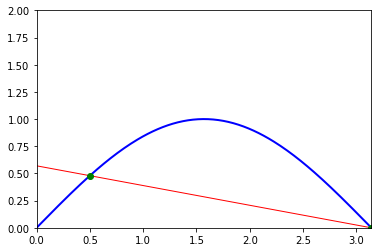

In [12]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


fig = plt.figure()
ax = plt.axes(xlim=(0, np.pi), ylim=(0, 2))
line, = ax.plot([], [], 'b', lw=2)
line2, = ax.plot([], [], 'r', lw=1)
dot, = ax.plot([], [], 'go')


f = lambda x: np.sin(x)
recta = lambda x, θ: θ*(x - x0) + y0 

X = np.linspace(0, np.pi, 200)


x0 = 0.5; y0 = f(x0)
θ = 0.5


Theta = np.linspace(θ, θ, 200)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(X, list(map(f, X)))

    θ = (f(X[i]) - f(x0)) / (X[i]- x0)
    line2.set_data(X, recta(X, θ) )

    dot.set_data([x0, X[i]], [f(x0), f(X[i])])
    
    return line, line2, dot



anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('basic_animation3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])